    Age  AMV  Met   Clo  Dewpt  PlaneRadTemp    Ta       Tmrt   Vel  AirTurb  \
0   NaN  2.0  2.1  0.65    NaN           NaN  19.1  19.629472  0.06      NaN   
1   NaN  2.0  2.1  0.78    NaN           NaN  19.1  19.629472  0.06      NaN   
2   NaN  1.0  2.1  1.05    NaN           NaN  20.0  19.046655  0.06      NaN   
3   NaN  3.0  2.6  0.40    NaN           NaN  21.0  20.153116  0.06      NaN   
4   NaN  3.0  3.0  0.37    NaN           NaN  23.0  21.942458  0.06      NaN   
5   NaN  1.0  2.1  1.29    NaN           NaN  19.8  19.429333  0.06      NaN   
6   NaN  2.0  2.1  0.60    NaN           NaN  20.0  19.046655  0.06      NaN   
7   NaN  1.0  2.6  0.48    NaN           NaN  21.6  22.023007  0.06      NaN   
8   NaN  2.0  2.6  0.51    NaN           NaN  21.2  20.670849  0.06      NaN   
9   NaN  2.0  2.6  0.54    NaN           NaN  25.2  24.672009  0.06      NaN   
10  NaN  3.0  2.6  0.49    NaN           NaN  23.7  22.008010  0.06      NaN   
11  NaN  1.0  3.1  0.44    NaN          

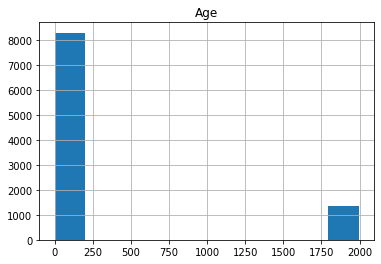

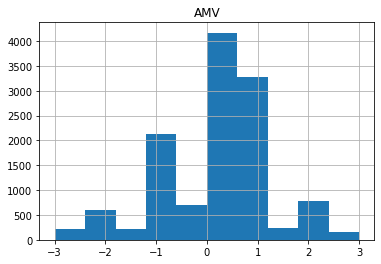

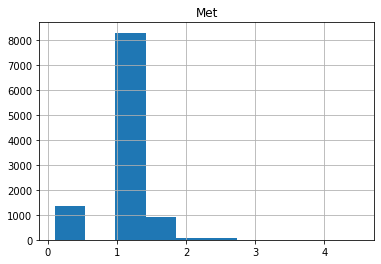

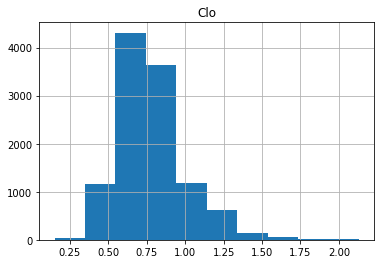

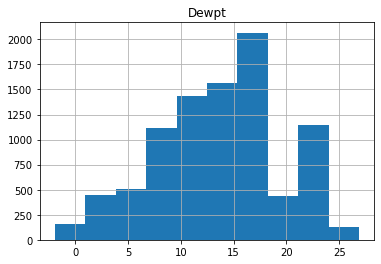

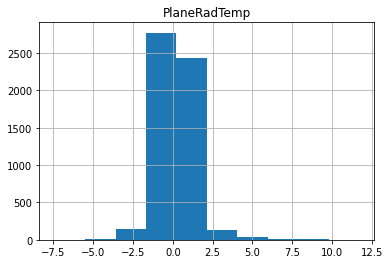

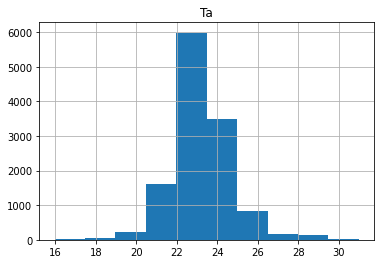

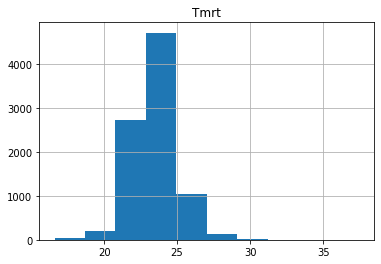

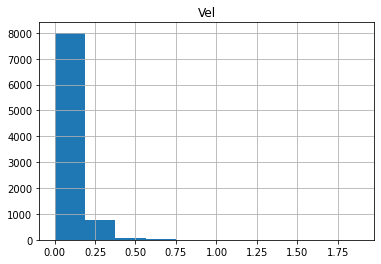

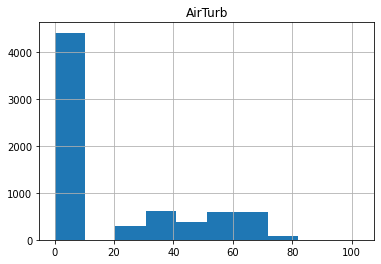

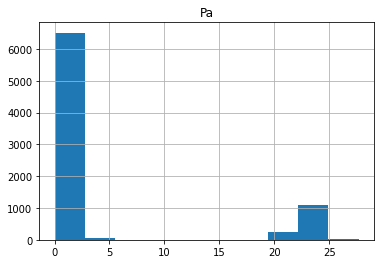

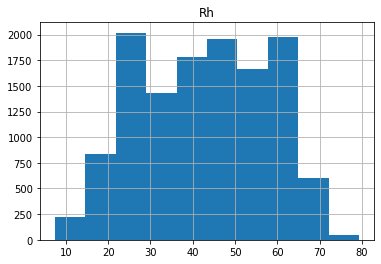

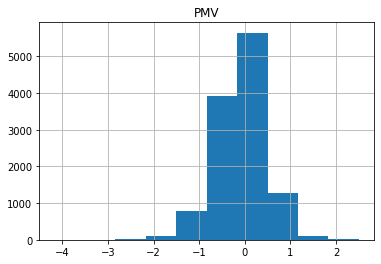

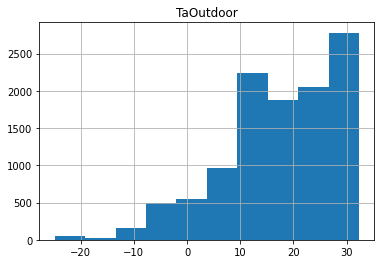

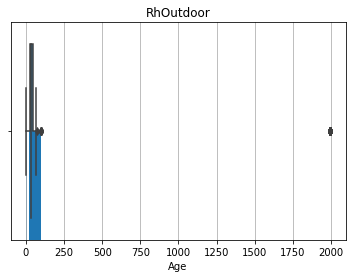

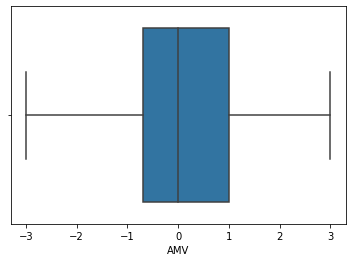

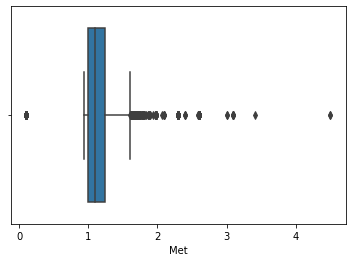

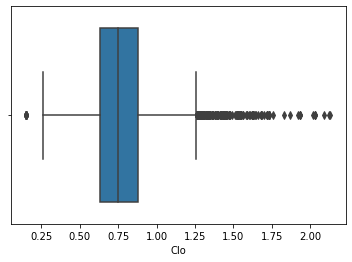

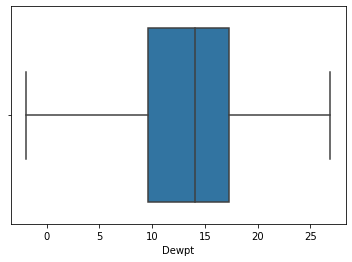

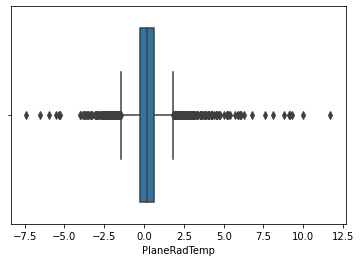

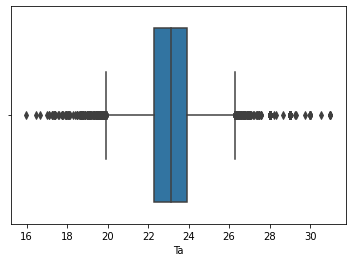

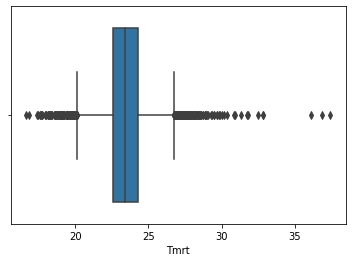

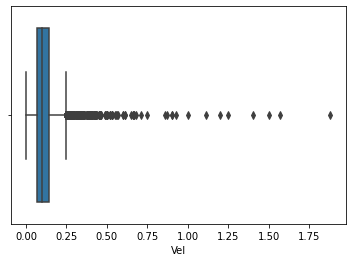

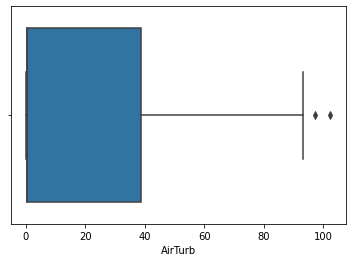

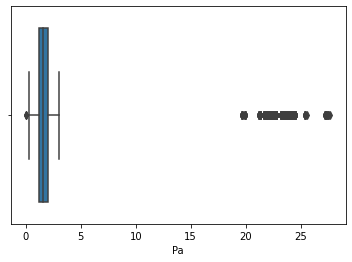

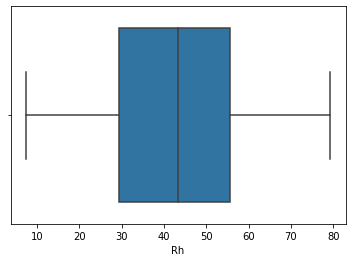

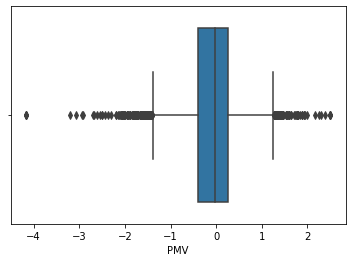

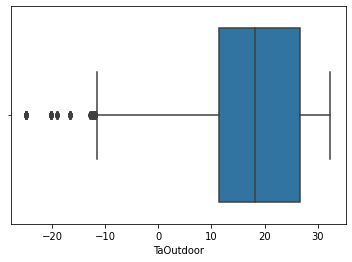

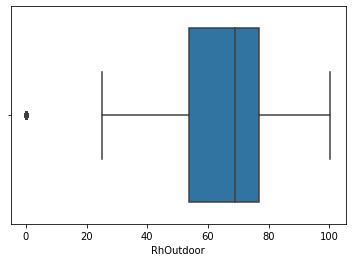

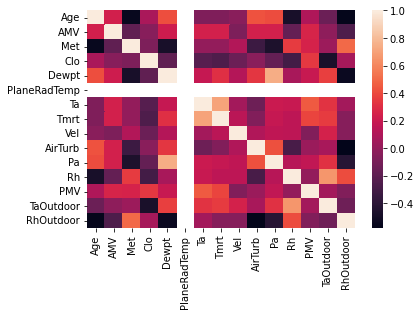

                   Age       AMV       Met       Clo     Dewpt  PlaneRadTemp  \
Age           1.000000  0.236761 -0.546673  0.081178  0.413951           NaN   
AMV           0.236761  1.000000 -0.189823 -0.040094  0.221648           NaN   
Met          -0.546673 -0.189823  1.000000 -0.075682 -0.481384           NaN   
Clo           0.081178 -0.040094 -0.075682  1.000000 -0.190915           NaN   
Dewpt         0.413951  0.221648 -0.481384 -0.190915  1.000000           NaN   
PlaneRadTemp       NaN       NaN       NaN       NaN       NaN           NaN   
Ta           -0.068189  0.245830  0.000579 -0.225638  0.185951           NaN   
Tmrt         -0.070241  0.246782  0.004872 -0.255281  0.310802           NaN   
Vel          -0.033822 -0.075050  0.112694 -0.146978  0.117289           NaN   
AirTurb       0.428031  0.245072 -0.330302 -0.034395  0.335808           NaN   
Pa            0.409693  0.242924 -0.461501 -0.167473  0.744687           NaN   
Rh           -0.478668 -0.169134  0.3537

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
from scipy.stats import entropy
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import math

data = pd.read_excel('/CollectedData.xlsx', sheet_name='Sheet2', header=None, usecols=[2, 7, 18, 21, 25, 26, 36, 37, 39, 41, 42, 43, 48, 73, 76], names=['Age', 'AMV', 'Met','Clo', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'PMV', 'TaOutdoor','RhOutdoor'])
print(data.head(20))

# Printing information about features

print("\nTotal instances:\n\n",len(data.axes[0]))
print("\nTotal number of nulls:\n\n",data.isnull().sum())
print("\nMedian:\n\n",data.median())
print("\nMode:\n\n",data.mode())
print("\nVariance:\n\n",data.var())
print("\nTotal number of outliers:\n")
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
for column_name in data:
  outliers = find_outliers_IQR(data[column_name])
  print(column_name," " + str(len(outliers)))
print(data.describe())

# Plotting Histogram and BoxPlot of Features

for i in data:
  data.hist(i)
for i in data:
  sns.boxplot(x=data[i])
  plt.show()

# Handling Missing Values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Clo']=data['Clo'].fillna(data['Clo'].median())
data['Met']=data['Met'].fillna(data['Met'].median())
data['Dewpt']=data['Dewpt'].fillna(data['Dewpt'].mean())
data['PlaneRadTemp']=data['PlaneRadTemp'].fillna(data['PlaneRadTemp'].median())
data['Ta']=data['Ta'].fillna(data['Ta'].median())
data['Tmrt']=data['Tmrt'].fillna(data['Tmrt'].median())
data['Vel']=data['Vel'].fillna(data['Vel'].median())
data['AirTurb']=data['AirTurb'].fillna(data['AirTurb'].median())
data['Pa']=data['Pa'].fillna(data['Pa'].median())
data['Rh']=data['Rh'].fillna(data['Rh'].mean())
data['TaOutdoor']=data['TaOutdoor'].fillna(data['TaOutdoor'].median())
data['RhOutdoor']=data['RhOutdoor'].fillna(data['RhOutdoor'].median())
data['AMV']=data['AMV'].fillna(data['AMV'].mean())
data['PMV']=data['PMV'].fillna(data['PMV'].median())

# Handling Outliers
for i in data:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3 - q1
  lower_limit = q1 -(1.5*IQR)
  upper_limit = q3 + (1.5*IQR)
  data[i]=np.where(data[i]>upper_limit,upper_limit,np.where(data[i]<lower_limit,lower_limit,data[i]))

# Correlation matrix (Heat Map)
dataplot=sns.heatmap(data.corr())
plt.show()
print(data.corr())

# Calulating entropy and Info Gain

print("\n")
def calculate_entropy(df):
  value, counts = np.unique(df, return_counts=True)  #from github
  return entropy(counts)
for i in data:
  print('Entropy: ', i, ":" ,' {}'.format(calculate_entropy(data[i])))
print("\n")
for i in data:
  print('Info Gain: ', i, ":" ,' {}'.format(1-calculate_entropy(data[i])))

Features = ['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor']
X = data.loc[:, Features]
Response_variable = ['AMV' ,'PMV']
Y= data.loc[:, Response_variable]
# split the dataset
num=int(len(data)*0.8)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=num)
normalized_data = preprocessing.normalize(data)
print(normalized_data)


# Forward and Backward Selection
%pip install mlxtend --upgrade
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Y_R1=data['PMV']
x_train, x_test, y_train, y_test = train_test_split(X, Y_R1, test_size=0.20, random_state=0)
f_s=SFS(LinearRegression(),k_features='best',forward=True,floating=False,scoring='r2',cv=0)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

x_train, x_test, y_train, y_test = train_test_split(X, Y_R1, test_size=0.20, random_state=0)
f_s=SFS(LinearRegression(),k_features='best',forward=False,floating=False,scoring='r2',cv=0)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

data['AMV']=pd.cut(data['AMV'],bins=[-10,-2.5,-1.5,-0.5,0.5,1.5,2.5,10],labels=[-3,-2,-1,0,1,2,3])
Y_R2=data['AMV']
x_train, x_test, y_train, y_test = train_test_split(X, Y_R2, test_size=0.20, random_state=0)
f_s=SFS(LogisticRegression(),k_features='best',forward=True,floating=False,scoring='r2',cv=0)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

x_train, x_test, y_train, y_test = train_test_split(X, Y_R2, test_size=0.20, random_state=0)
f_s=SFS(LogisticRegression(),k_features='best',forward=False,floating=False,scoring='r2',cv=0)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

optimal_feature_linear=data.iloc[:,[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]]
x_train, x_test, y_train, y_test = train_test_split(optimal_feature_linear.iloc[:,0:-1], data['PMV'], test_size=0.20, random_state=0)
f_s=SFS(LinearRegression(),k_features='best',forward=True,floating=False,scoring='r2',cv=3)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

optimal_feature_linear=data.iloc[:,[0, 1, 3, 4, 5, 6, 7, 9, 10, 12]]
x_train, x_test, y_train, y_test = train_test_split(optimal_feature_linear.iloc[:,0:-1], data['PMV'], test_size=0.20, random_state=0)
f_s=SFS(LogisticRegression(),k_features='best',forward=True,floating=False,scoring='r2',cv=3)
f_s=f_s.fit(x_train,y_train)
f_s.subsets_

test_arr=data.iloc[:,[0, 1, 2, 3, 4, 5]]
x_train, x_test, y_train, y_test = train_test_split(test_arr, data['AMV'], test_size=0.20, random_state=0)
logr=LogisticRegression()
logr.fit(x_train,y_train)
predicted=logr.predict(x_test)
predicted
from sklearn.metrics import confusion_matrix
con_matrix=confusion_matrix(y_test,predicted)
print(con_matrix)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predicted,y_test)
print('Accuracy:',accuracy)